# XGBoost

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 CPU 환경에서 빠르게 학습 가능

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score 

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
import warnings

warnings.filterwarnings(action='ignore')

## 파이썬 기반 XGBoost

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [4]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective': 'binary:logistic',
    'eval_metric':'logloss',
    'early_stopping':100
}
num_rounds=400

In [5]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, 
                      num_boost_round=num_rounds,
                      early_stopping_rounds=100,
                      evals=evals)



[12:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60944	eval-logloss:0.61010
[1]	train-logloss:0.54047	eval-logloss:0.54074
[2]	train-logloss:0.48211	eval-logloss:0.48490
[3]	train-logloss:0.43365	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.35372	eval-logloss:0.36211
[6]	train-logloss:0.32222	eval-logloss:0.32996
[7]	train-logloss:0.29292	eval-logloss:0.30179
[8]	train-logloss:0.26731	eval-logloss:0.27801
[9]	train-logloss:0.24409	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.24037
[11]	train-logloss:0.20807	eval-logloss:0.22271
[12]	train-logloss:0.19177	eval-logloss:

In [6]:
import numpy as np

predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10], 3))

[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [7]:
preds = [1 if x> 0.5 else 0 for x in predicts]

In [8]:
print('정확도 : {}'.format(accuracy_score(y_test,preds)))
print('정밀도 : {}'.format(precision_score(y_test,preds)))
print('재현율 : {}'.format(recall_score(y_test,preds)))

정확도 : 0.9736842105263158
정밀도 : 0.972972972972973
재현율 : 0.9863013698630136


중요도 시각화

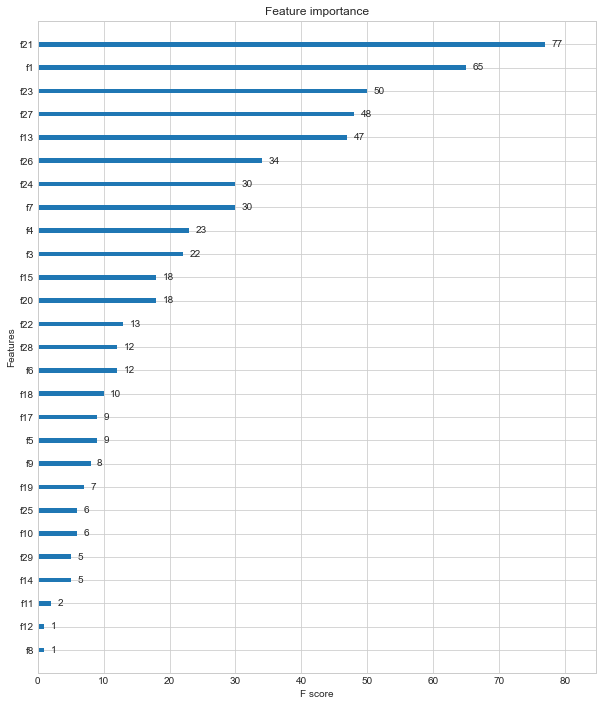

In [9]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax);

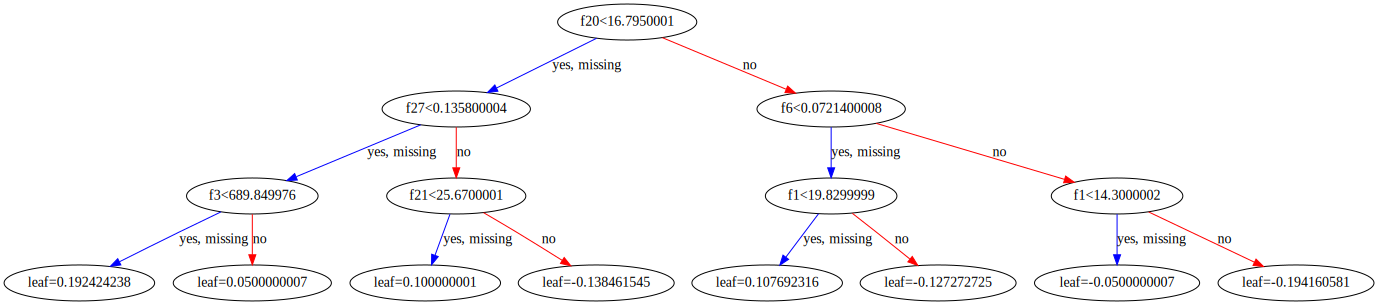

In [10]:
dot_data = xgb.to_graphviz(xgb_model)
graph = graphviz.Source(dot_data)
graph

## XGBClassifier

### 붓꽃 데이터

In [11]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=123)

In [12]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, 
                     max_depth=3, verbosity = 0)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)

In [13]:
cross_val = cross_validate(
        estimator=xgbc,
        X=iris.data, y=iris.target,
        cv=5)

print('avg fit time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-){}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-){}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))


avg fit time: 0.17940359115600585 (+/-) 0.01832204048797643
avg score time: 0.0032837390899658203 (+/-)0.0003934886405754207
avg test score: 0.96 (+/-)0.024944382578492935


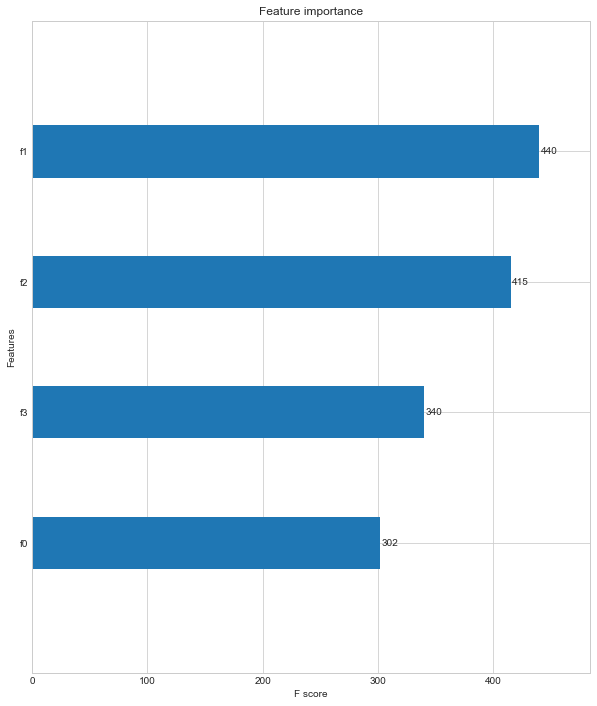

In [14]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax, height=0.4);

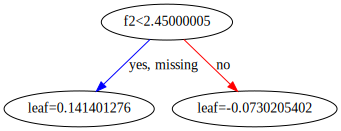

In [15]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

### 와인 데이터

In [16]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                    test_size=0.2, random_state=123)

In [17]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, 
                     max_depth=3, verbosity = 0)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)

In [18]:
cross_val = cross_validate(
        estimator=xgbc,
        X=wine.data, y=wine.target,
        cv=5)

print('avg fit time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-){}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-){}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))


avg fit time: 0.16134247779846192 (+/-) 0.00604978142300232
avg score time: 0.00349884033203125 (+/-)0.00044741194776884473
avg test score: 0.9609523809523809 (+/-)0.028267341226138717


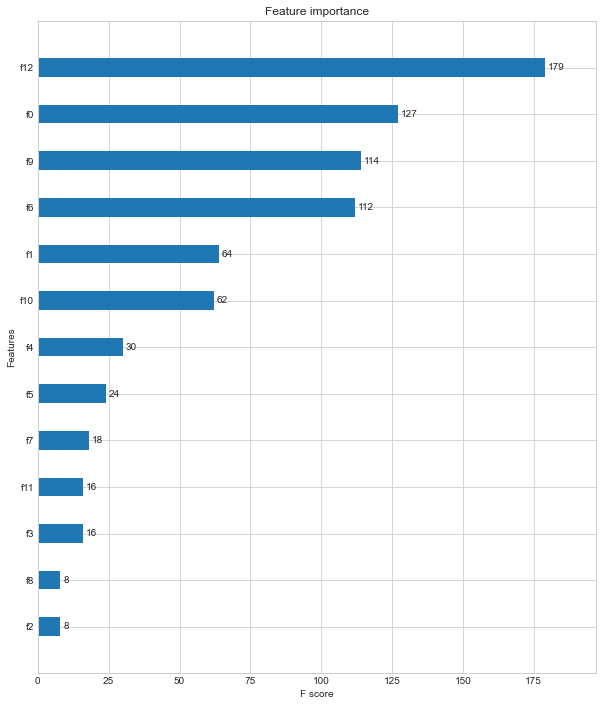

In [19]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax, height=0.4);

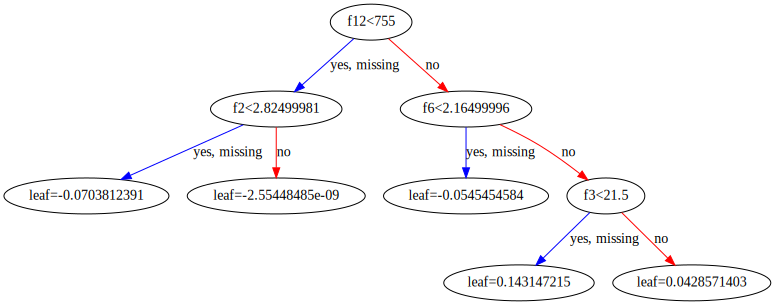

In [20]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

### 유방암 데이터

In [21]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=123)

In [22]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, 
                     max_depth=3, verbosity = 0)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]


In [23]:
cross_val = cross_validate(
        estimator=xgbc,
        X=cancer.data, y=cancer.target,
        cv=5)

print('avg fit time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-){}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-){}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))


avg fit time: 0.1759406089782715 (+/-) 0.042998478056963434
avg score time: 0.003600597381591797 (+/-)0.000490076728590467
avg test score: 0.9736376339077782 (+/-)0.009609619188189153


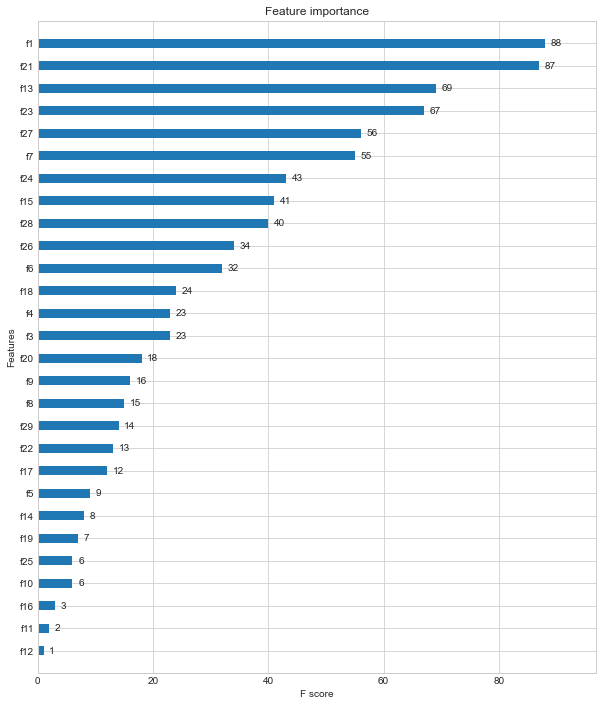

In [24]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax, height=0.4);

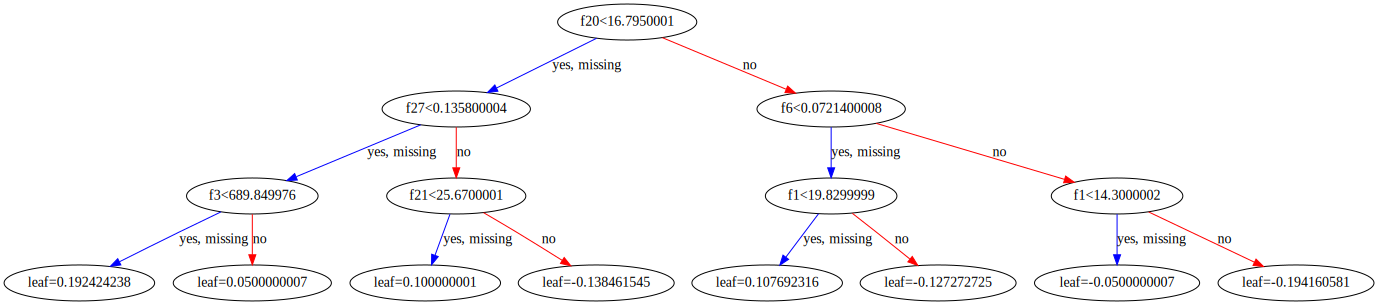

In [25]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

## XGBRegressor

### 보스턴 데이터

In [26]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    test_size=0.2, random_state=123)

In [27]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, 
                     max_depth=3, verbosity = 0,
                    objective='reg:squarederror')

xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)


In [28]:
cross_val = cross_validate(
        estimator=xgbr,
        X=boston.data, y=boston.target,
        cv=5)

print('avg fit time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-){}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-){}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))


avg fit time: 0.15186266899108886 (+/-) 0.01290708432742745
avg score time: 0.004214715957641601 (+/-)0.0003941934486046183
avg test score: 0.6884390736705599 (+/-)0.1649974770303876


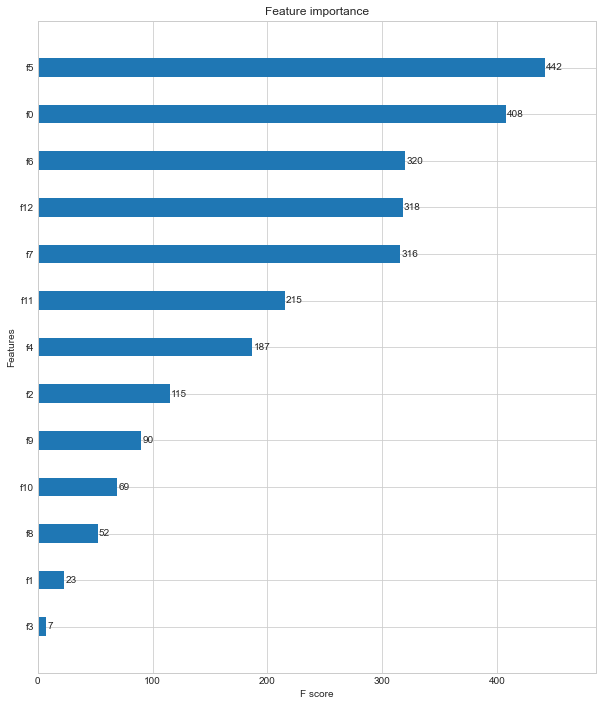

In [29]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax, height=0.4);

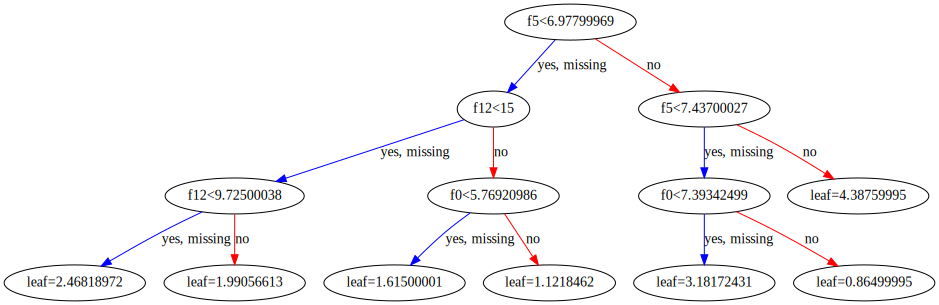

In [30]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

### 당뇨병 데이터

In [31]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.2, random_state=123)

In [32]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, 
                     max_depth=3, verbosity = 0,
                    objective='reg:squarederror')

xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)


In [33]:
cross_val = cross_validate(
        estimator=xgbr,
        X=diabetes.data, y=diabetes.target,
        cv=5)

print('avg fit time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-){}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-){}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))


avg fit time: 0.15242419242858887 (+/-) 0.02577208760973517
avg score time: 0.004001092910766601 (+/-)0.000632636094195861
avg test score: 0.30005291115066424 (+/-)0.07589309667544569


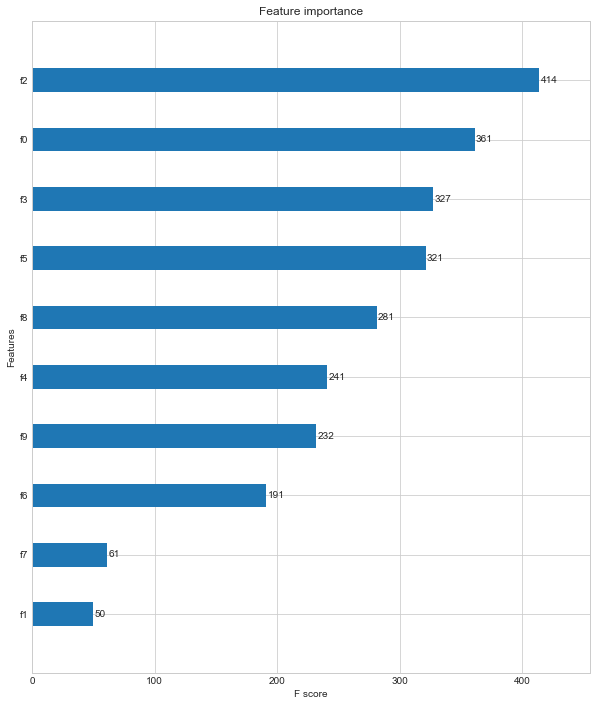

In [34]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax, height=0.4);

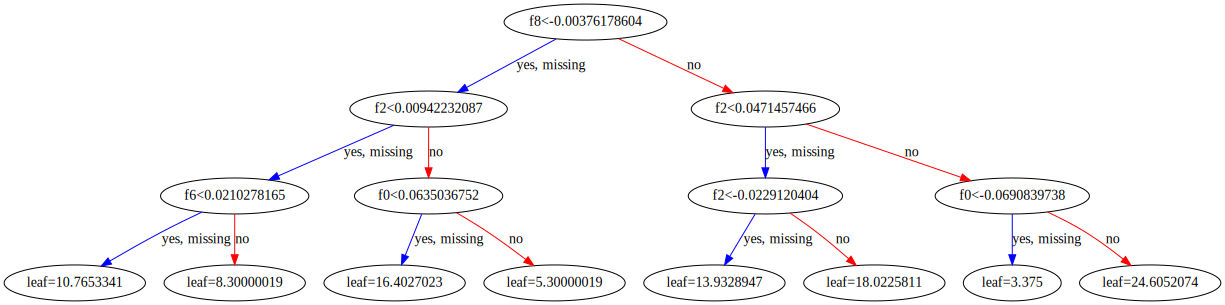

In [35]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

# LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할

In [36]:
# !pip install lightgbm --upgrade

In [37]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

## LGBMClassifier

### 붓꽃 데이터

In [38]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [39]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X=X_train, y=y_train, early_stopping_rounds=100,
          eval_metric='logloss', eval_set=evals, verbose=True)

preds = lgbmc.predict(X_test)

[1]	valid_0's multi_logloss: 0.95847
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0

In [40]:
cross_val = cross_validate(
        estimator=lgbmc,
        X=iris.data, y=iris.target,
        cv=5)

print('avg fit time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-){}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-){}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))


avg fit time: 0.08952279090881347 (+/-) 0.006099708862714038
avg score time: 0.0012011051177978516 (+/-)0.00039961524029470723
avg test score: 0.9600000000000002 (+/-)0.04898979485566355


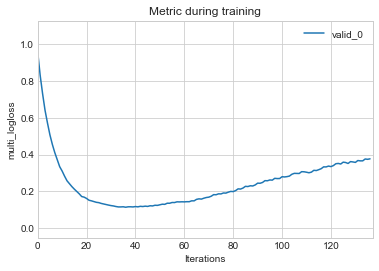

In [41]:
plot_metric(lgbmc);

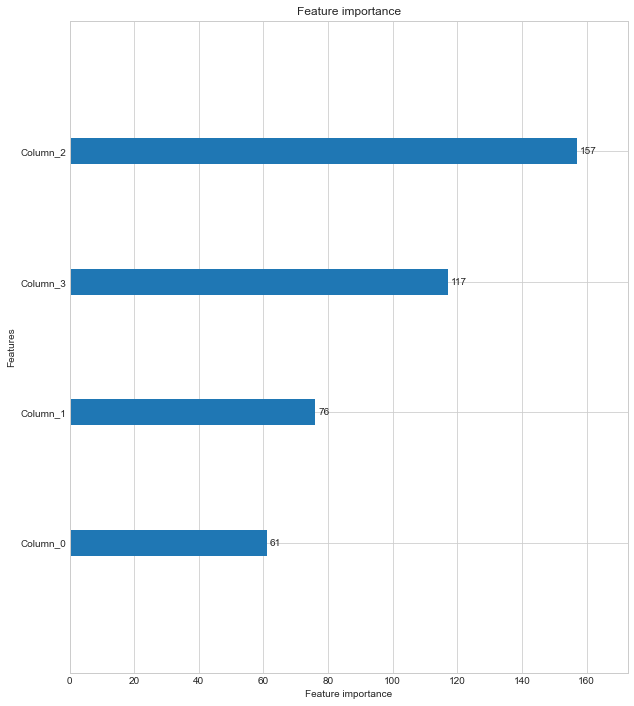

In [42]:
plot_importance(lgbmc, figsize=(10, 12));

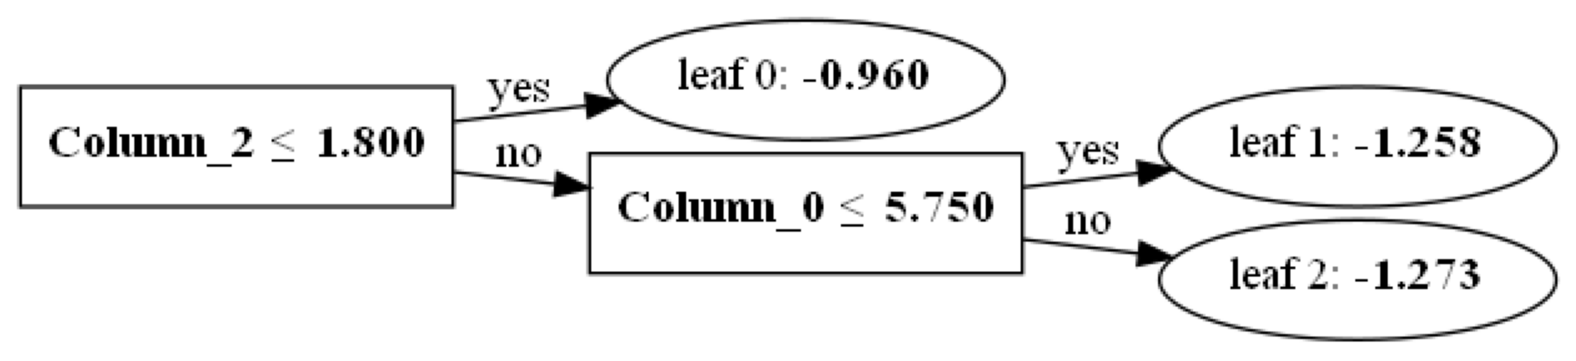

In [43]:
plot_tree(lgbmc, figsize=(28, 24));

### 와인 데이터

In [44]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)

In [45]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X=X_train, y=y_train, early_stopping_rounds=100,
          eval_metric='logloss', eval_set=evals, verbose=True)

preds = lgbmc.predict(X_test)

[1]	valid_0's multi_logloss: 1.05985
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.941671
[3]	valid_0's multi_logloss: 0.838354
[4]	valid_0's multi_logloss: 0.761596
[5]	valid_0's multi_logloss: 0.677439
[6]	valid_0's multi_logloss: 0.607711
[7]	valid_0's multi_logloss: 0.556301
[8]	valid_0's multi_logloss: 0.51301
[9]	valid_0's multi_logloss: 0.460772
[10]	valid_0's multi_logloss: 0.418941
[11]	valid_0's multi_logloss: 0.386691
[12]	valid_0's multi_logloss: 0.354477
[13]	valid_0's multi_logloss: 0.325968
[14]	valid_0's multi_logloss: 0.302653
[15]	valid_0's multi_logloss: 0.279562
[16]	valid_0's multi_logloss: 0.258911
[17]	valid_0's multi_logloss: 0.239598
[18]	valid_0's multi_logloss: 0.220811
[19]	valid_0's multi_logloss: 0.203974
[20]	valid_0's multi_logloss: 0.188324
[21]	valid_0's multi_logloss: 0.175522
[22]	valid_0's multi_logloss: 0.162242
[23]	valid_0's multi_logloss: 0.151123
[24]	valid_0's multi_logloss: 0.140635
[25]	valid_0'

In [46]:
cross_val = cross_validate(
        estimator=lgbmc,
        X=wine.data, y=wine.target,
        cv=5)

print('avg fit time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-){}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-){}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))


avg fit time: 0.0736161231994629 (+/-) 0.008115912391055972
avg score time: 0.001000356674194336 (+/-)3.1629798797182086e-07
avg test score: 0.9776190476190475 (+/-)0.01119469694127331


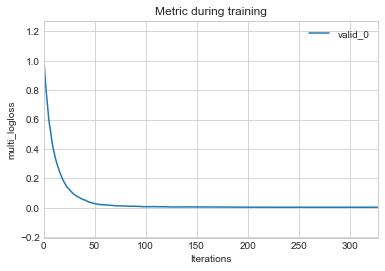

In [47]:
plot_metric(lgbmc);

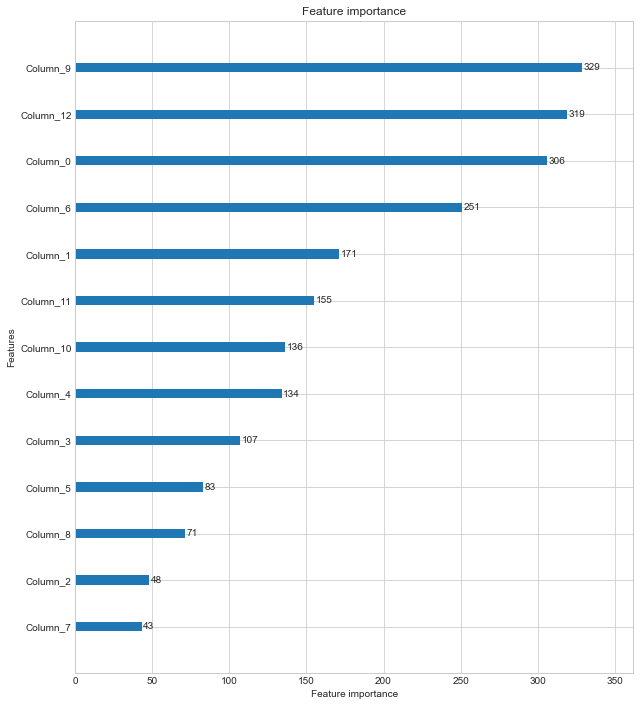

In [48]:
plot_importance(lgbmc, figsize=(10, 12));

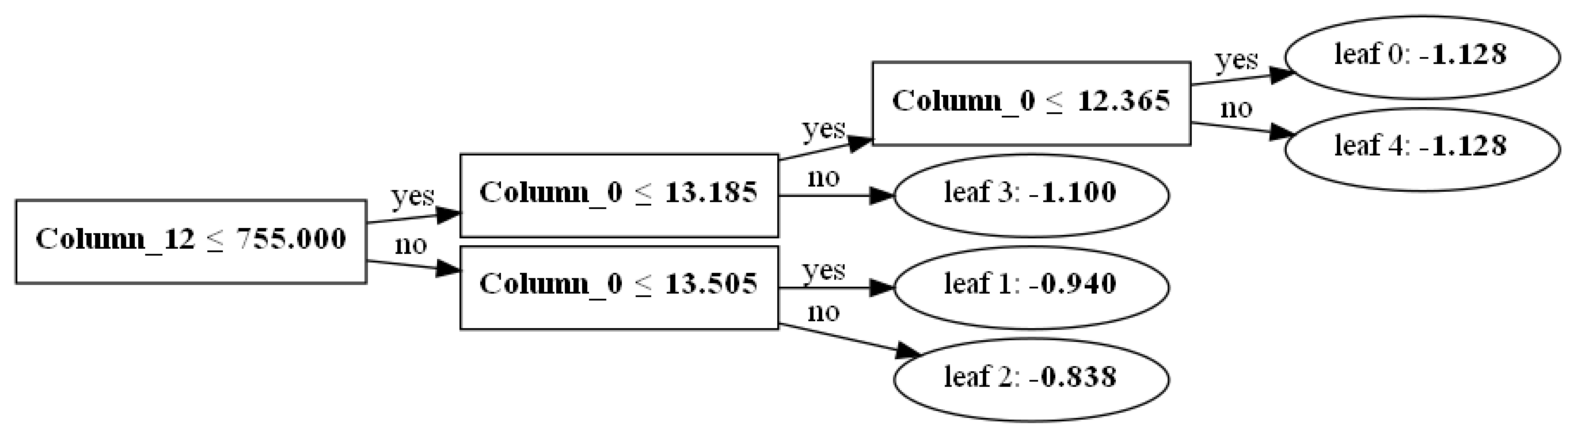

In [49]:
plot_tree(lgbmc, figsize=(28, 24));

### 유방암 데이터

In [50]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)

In [51]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X=X_train, y=y_train, early_stopping_rounds=100,
          eval_metric='logloss', eval_set=evals, verbose=True)

preds = lgbmc.predict(X_test)

[1]	valid_0's binary_logloss: 0.575665
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.513919
[3]	valid_0's binary_logloss: 0.463418
[4]	valid_0's binary_logloss: 0.420506
[5]	valid_0's binary_logloss: 0.383433
[6]	valid_0's binary_logloss: 0.351962
[7]	valid_0's binary_logloss: 0.325134
[8]	valid_0's binary_logloss: 0.301618
[9]	valid_0's binary_logloss: 0.276072
[10]	valid_0's binary_logloss: 0.259487
[11]	valid_0's binary_logloss: 0.244766
[12]	valid_0's binary_logloss: 0.224551
[13]	valid_0's binary_logloss: 0.211222
[14]	valid_0's binary_logloss: 0.197052
[15]	valid_0's binary_logloss: 0.187863
[16]	valid_0's binary_logloss: 0.180071
[17]	valid_0's binary_logloss: 0.172646
[18]	valid_0's binary_logloss: 0.162952
[19]	valid_0's binary_logloss: 0.154079
[20]	valid_0's binary_logloss: 0.146169
[21]	valid_0's binary_logloss: 0.140076
[22]	valid_0's binary_logloss: 0.132763
[23]	valid_0's binary_logloss: 0.127181
[24]	valid_0's binary_loglo

In [52]:
cross_val = cross_validate(
        estimator=lgbmc,
        X=cancer.data, y=cancer.target,
        cv=5)

print('avg fit time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-){}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-){}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))


avg fit time: 0.10677127838134766 (+/-) 0.008219979578653057
avg score time: 0.0010005950927734375 (+/-)5.091227651611e-07
avg test score: 0.9736531594472908 (+/-)0.015674460437800138


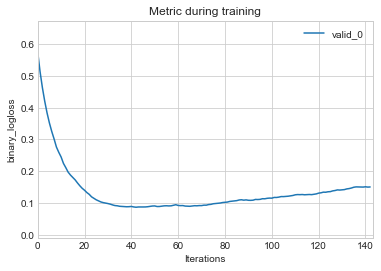

In [53]:
plot_metric(lgbmc);

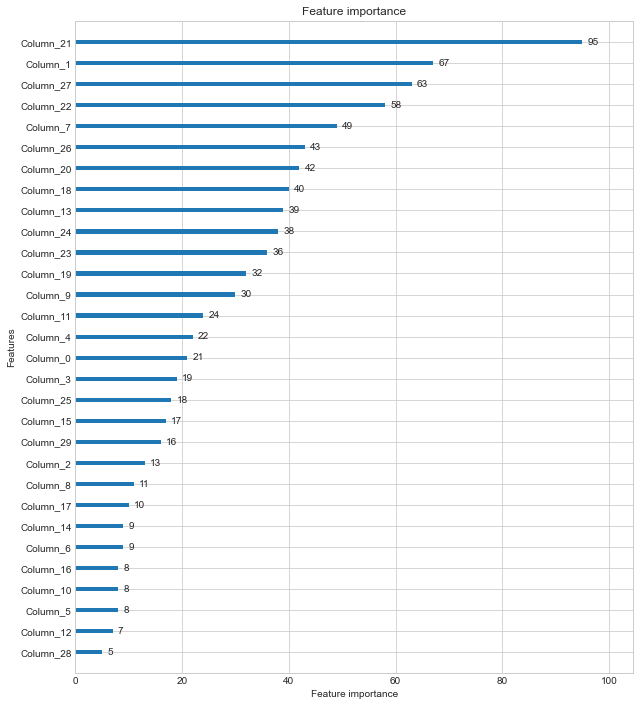

In [54]:
plot_importance(lgbmc, figsize=(10, 12));

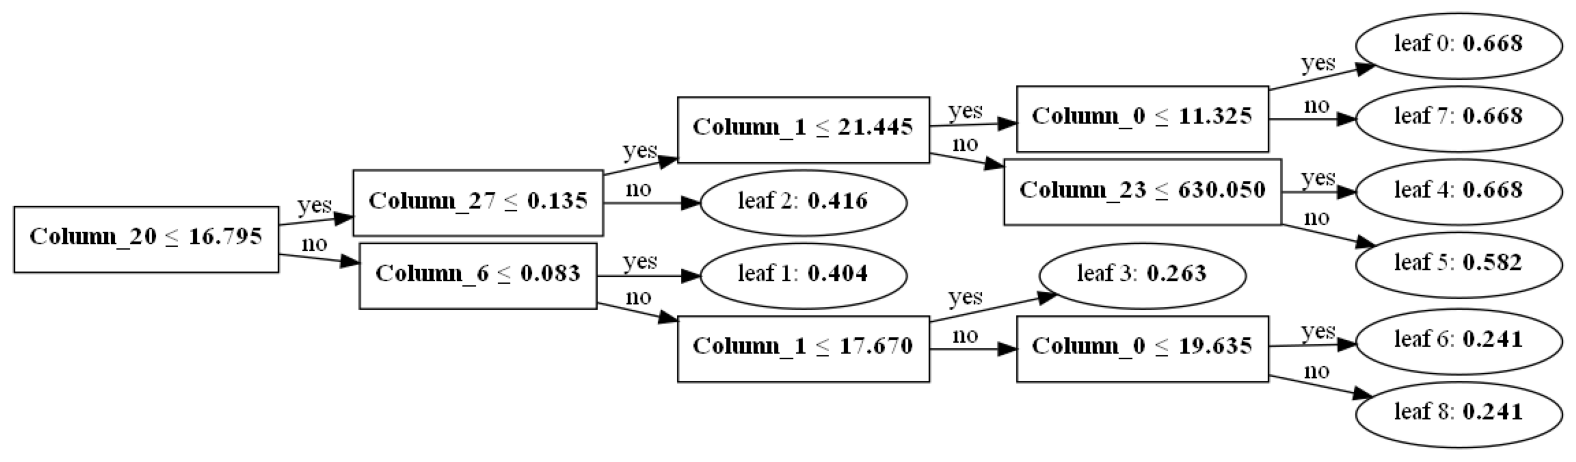

In [55]:
plot_tree(lgbmc, figsize=(28, 24));

## LGBMRegressor

### 보스턴 데이터

In [56]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=123)

In [57]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X=X_train, y=y_train, early_stopping_rounds=100,
          eval_metric='logloss', eval_set=evals, verbose=True)

preds = lgbmr.predict(X_test)

[1]	valid_0's l2: 71.4897
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	val

In [58]:
cross_val = cross_validate(
        estimator=lgbmr,
        X=boston.data, y=boston.target,
        cv=5)

print('avg fit time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-){}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-){}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))


avg fit time: 0.11502923965454101 (+/-) 0.011886102316785272
avg score time: 0.001600360870361328 (+/-)0.0004897679293921509
avg test score: 0.5692468252571979 (+/-)0.2956636613238221


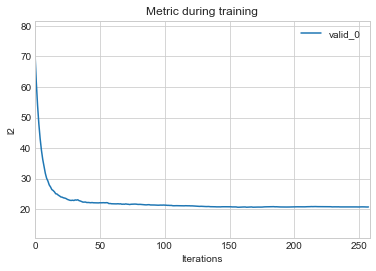

In [59]:
plot_metric(lgbmr);

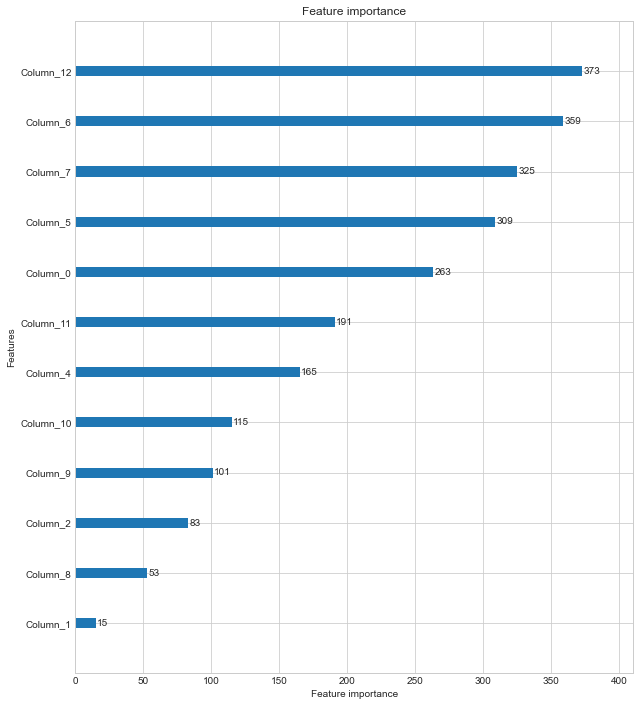

In [60]:
plot_importance(lgbmr, figsize=(10, 12));

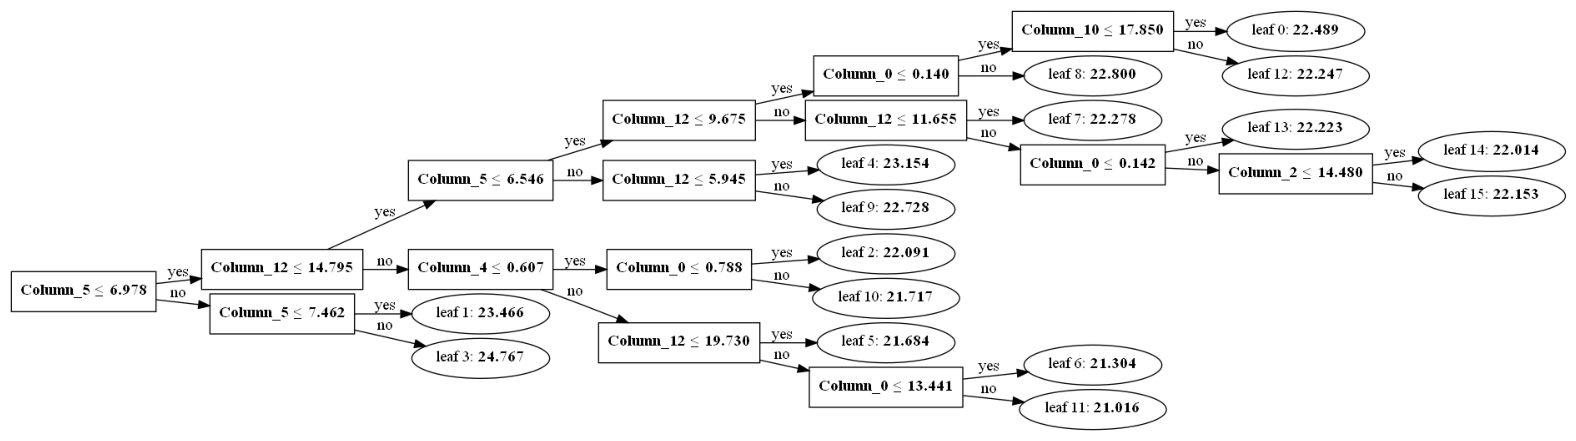

In [61]:
plot_tree(lgbmr, figsize=(28, 24));

### 당뇨병 데이터

In [62]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)

In [63]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X=X_train, y=y_train, early_stopping_rounds=100,
          eval_metric='logloss', eval_set=evals, verbose=True)

preds = lgbmr.predict(X_test)

[1]	valid_0's l2: 5692.17
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 5218.79
[3]	valid_0's l2: 4835.34
[4]	valid_0's l2: 4479.84
[5]	valid_0's l2: 4183.42
[6]	valid_0's l2: 3924.35
[7]	valid_0's l2: 3726.96
[8]	valid_0's l2: 3555.3
[9]	valid_0's l2: 3407.95
[10]	valid_0's l2: 3291.33
[11]	valid_0's l2: 3201.78
[12]	valid_0's l2: 3114.69
[13]	valid_0's l2: 3059.18
[14]	valid_0's l2: 3005.79
[15]	valid_0's l2: 2945.18
[16]	valid_0's l2: 2876.37
[17]	valid_0's l2: 2822.71
[18]	valid_0's l2: 2791.31
[19]	valid_0's l2: 2786.39
[20]	valid_0's l2: 2745.25
[21]	valid_0's l2: 2724.07
[22]	valid_0's l2: 2705.17
[23]	valid_0's l2: 2685.41
[24]	valid_0's l2: 2663.2
[25]	valid_0's l2: 2659.75
[26]	valid_0's l2: 2636.48
[27]	valid_0's l2: 2615.15
[28]	valid_0's l2: 2640.63
[29]	valid_0's l2: 2624.73
[30]	valid_0's l2: 2615.14
[31]	valid_0's l2: 2601.41
[32]	valid_0's l2: 2593.79
[33]	valid_0's l2: 2555.64
[34]	valid_0's l2: 2572.12
[35]	valid_0's l2: 2581.22
[36]

In [64]:
cross_val = cross_validate(
        estimator=lgbmr,
        X=diabetes.data, y=diabetes.target,
        cv=5)

print('avg fit time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-){}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-){}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))


avg fit time: 0.08802075386047363 (+/-) 0.0032252475403439906
avg score time: 0.0014009475708007812 (+/-)0.0004899798915606684
avg test score: 0.30867643947179507 (+/-)0.07010708786960605


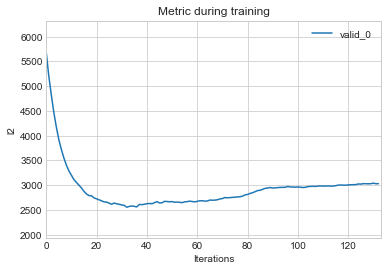

In [65]:
plot_metric(lgbmr);

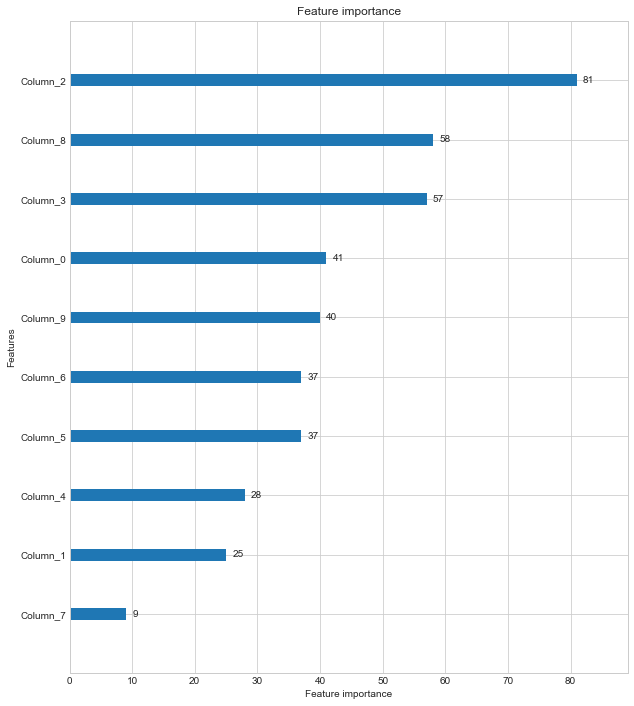

In [66]:
plot_importance(lgbmr, figsize=(10, 12));

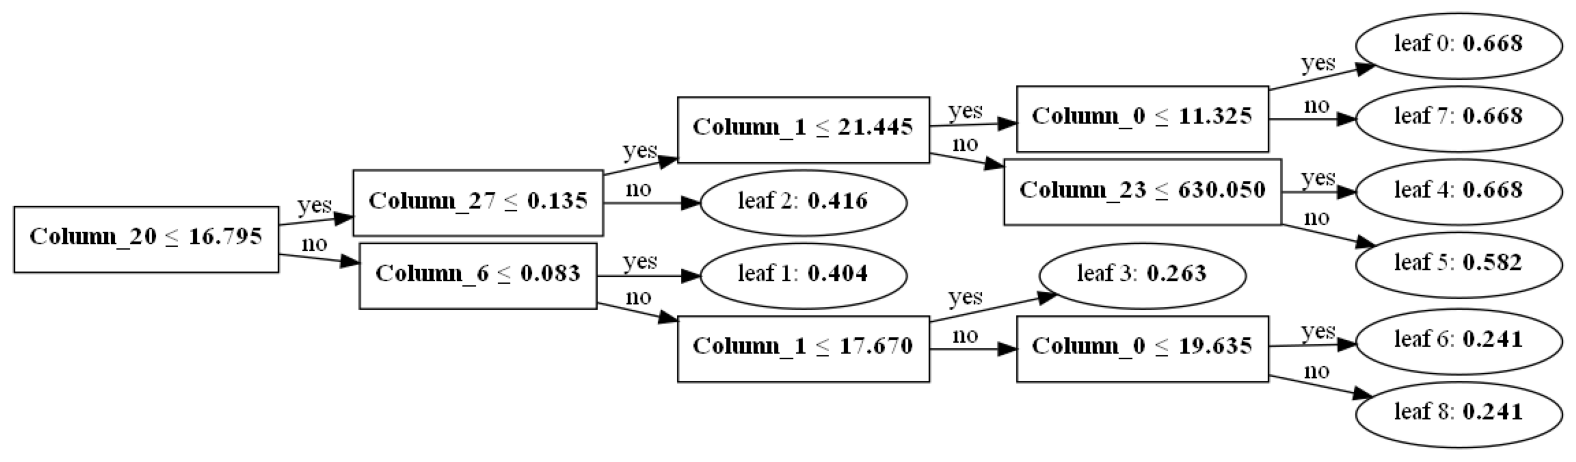

In [67]:
plot_tree(lgbmc, figsize=(28, 24));